## Konfigurowanie środowiska w Anaconda

Zaistalowano java, spark.., wg https://www.youtube.com/watch?v=NFpW6JgNaQk oraz https://changhsinlee.com/install-pyspark-windows-jupyter/

In [2]:
# Polecenie do zainstalowania pyspark py4j pakietów:

! pip install pyspark py4j

Defaulting to user installation because normal site-packages is not writeable


## Tworzenie SparkSession


Przykładowa sesjia SparkSession:

In [7]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local[*]")\
        .appName('PySpark_Tutorial')\
        .getOrCreate()


## Czytanie danych
Za pomocą `spark.read` możemy odczytywać dane z plików różnych formatów, takich jak CSV, JSON, Parquet i inne. Oto kilka przykładów pobierania danych z plików:

In [10]:
# Czytanie CSV plika
csv_file = 'IHME_GDP_1960_2050_Y2021M09D22.csv'
df = spark.read.csv(csv_file)

# Czytanie JSON plika
#json_file = 'data/unece.json'
#data = spark.read.json(json_file)

# Czytanie parquet plika
#parquet_file = 'data/pems_parquet/pems_sorted/station=402260/part-r-00000-ddaee723-f3f6-4f25-a34b-3312172aa6d7.snappy.parquet'
#data1 = spark.read.parquet(parquet_file)

## Pobieranie danych za pomocą URL



In [11]:
from pyspark import SparkFiles

spark.sparkContext.addFile('https://storage.covid19datahub.io/level/1.csv')

df = spark.read.csv(SparkFiles.get("1.csv"), header=True)

# Strukturyzacja danych za pomocą schematu Spark

Kod do odczytu danych w formacie pliku CSV:

In [28]:
data = spark.read.csv(
    'IHME_GDP_1960_2050_Y2021M09D22.csv',
    sep=',',
    header=True,
)

data.printSchema()

root
 |-- location_id: string (nullable = true)
 |-- location_name: string (nullable = true)
 |-- iso3: string (nullable = true)
 |-- level: string (nullable = true)
 |-- year: string (nullable = true)
 |-- gdp_ppp_mean: string (nullable = true)
 |-- gdp_ppp_lower: string (nullable = true)
 |-- gdp_ppp_upper: string (nullable = true)
 |-- gdp_usd_mean: string (nullable = true)
 |-- gdp_usd_lower: string (nullable = true)
 |-- gdp_usd_upper: string (nullable = true)



Precyzowanie struktury danych. Poniższy kod tworzy strukturę danych za pomocą StructType i StructField

In [32]:
from pyspark.sql.types import *

data_schema = [
    StructField('location_id', IntegerType(), True),
    StructField('location_name', StringType(), True),
    StructField('iso3', StringType(), True),
    StructField('level', StringType(), True),
    StructField('year', IntegerType(), True),
    StructField('gdp_ppp_mean', DoubleType(), True),
    StructField('gdp_ppp_lower', DoubleType(), True),
    StructField('gdp_ppp_upper', DoubleType(), True),
    StructField('gdp_usd_mean', DoubleType(), True),
    StructField('gdp_usd_lower', DoubleType(), True),
    StructField('gdp_usd_upper', DoubleType(), True)]

final_struc = StructType(fields = data_schema)

data = spark.read.csv(
    'IHME_GDP_1960_2050_Y2021M09D22.csv',
    sep=',',
    header=True,
    schema=final_struc 
)

data.printSchema()

root
 |-- location_id: integer (nullable = true)
 |-- location_name: string (nullable = true)
 |-- iso3: string (nullable = true)
 |-- level: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- gdp_ppp_mean: double (nullable = true)
 |-- gdp_ppp_lower: double (nullable = true)
 |-- gdp_ppp_upper: double (nullable = true)
 |-- gdp_usd_mean: double (nullable = true)
 |-- gdp_usd_lower: double (nullable = true)
 |-- gdp_usd_upper: double (nullable = true)



# Różne metody kontroli danych
Dostępne są następujące metody kontroli danych: schema, dtypes, show, head, first, take, description, columns, count, different, printSchema. Przyjrzyjmy się im na przykładzie.

`schema()`: Ta metoda zwraca schemat danych (ramka danych):

In [33]:
data.schema

StructType([StructField('location_id', IntegerType(), True), StructField('location_name', StringType(), True), StructField('iso3', StringType(), True), StructField('level', StringType(), True), StructField('year', IntegerType(), True), StructField('gdp_ppp_mean', DoubleType(), True), StructField('gdp_ppp_lower', DoubleType(), True), StructField('gdp_ppp_upper', DoubleType(), True), StructField('gdp_usd_mean', DoubleType(), True), StructField('gdp_usd_lower', DoubleType(), True), StructField('gdp_usd_upper', DoubleType(), True)])

`dtypes` zwraca listę krotek z nazwami kolumn i typami danych.

In [34]:
data.dtypes

[('location_id', 'int'),
 ('location_name', 'string'),
 ('iso3', 'string'),
 ('level', 'string'),
 ('year', 'int'),
 ('gdp_ppp_mean', 'double'),
 ('gdp_ppp_lower', 'double'),
 ('gdp_ppp_upper', 'double'),
 ('gdp_usd_mean', 'double'),
 ('gdp_usd_lower', 'double'),
 ('gdp_usd_upper', 'double')]

`head(n)` zwraca n wierszy jako listę. Oto przykład:

In [35]:
data.head(3)

[Row(location_id=1, location_name='Global', iso3='G', level='Global', year=1960, gdp_ppp_mean=17483449774122.9, gdp_ppp_lower=16019146112388.8, gdp_ppp_upper=19115862416823.5, gdp_usd_mean=12968625317543.8, gdp_usd_lower=12668903338177.2, gdp_usd_upper=13341765801289.3),
 Row(location_id=1, location_name='Global', iso3='G', level='Global', year=1961, gdp_ppp_mean=18135370554950.5, gdp_ppp_lower=16595371585758.2, gdp_ppp_upper=19824927264221.5, gdp_usd_mean=13460972883451.6, gdp_usd_lower=13147665079303.8, gdp_usd_upper=13830213685062.9),
 Row(location_id=1, location_name='Global', iso3='G', level='Global', year=1962, gdp_ppp_mean=18953278607513.5, gdp_ppp_lower=17390391432341.6, gdp_ppp_upper=20614772322197.6, gdp_usd_mean=14065757980933.9, gdp_usd_lower=13760596066680.6, gdp_usd_upper=14437458446538.0)]

- `show()` domyślnie wyświetla pierwsze 20 wierszy, a także przyjmuje liczbę jako parametr określający ich liczbę.
- `first()` zwraca pierwszy wiersz danych.
- `take(n)` zwraca pierwsze `n` wierszy.
- `describe()` oblicza niektóre wartości statystyczne dla kolumn liczbowych.
- `columns` zwraca listę zawierającą nazwy kolumn.
- `count()` zwraca całkowitą liczbę wierszy w zestawie danych.
- `differ()` to liczba odmiennych wierszy w używanym zbiorze danych.
- `printSchema()` wyświetla schemat danych.

# Manipulacja kolumnami


1. Dodawanie kolumny: użyj `withColumn`, aby dodać nową kolumnę do istniejących. Metoda przyjmuje dwa parametry: nazwę kolumny i dane

In [36]:
data = data.withColumn('localtion_name_copy', data.location_name)

data.show(5)

+-----------+-------------+----+------+----+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+
|location_id|location_name|iso3| level|year|       gdp_ppp_mean|      gdp_ppp_lower|      gdp_ppp_upper|       gdp_usd_mean|      gdp_usd_lower|      gdp_usd_upper|localtion_name_copy|
+-----------+-------------+----+------+----+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+
|          1|       Global|   G|Global|1960|1.74834497741229E13|1.60191461123888E13|1.91158624168235E13|1.29686253175438E13|1.26689033381772E13|1.33417658012893E13|             Global|
|          1|       Global|   G|Global|1961|1.81353705549505E13|1.65953715857582E13|1.98249272642215E13|1.34609728834516E13|1.31476650793038E13|1.38302136850629E13|             Global|
|          1|       Global|   G|Global|1962|1.89532786075135E13|1.739039143

2. Aktualizacja kolumny: użyj `withColumnRenamed`, aby zmienić nazwę istniejącej kolumny. Metoda przyjmuje dwa parametry: nazwę istniejącej kolumny i jej nową nazwę. Przykład:

In [37]:
data = data.withColumnRenamed('localtion_name_copy', 'loc_copy')

data.show(5)

+-----------+-------------+----+------+----+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------+
|location_id|location_name|iso3| level|year|       gdp_ppp_mean|      gdp_ppp_lower|      gdp_ppp_upper|       gdp_usd_mean|      gdp_usd_lower|      gdp_usd_upper|loc_copy|
+-----------+-------------+----+------+----+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------+
|          1|       Global|   G|Global|1960|1.74834497741229E13|1.60191461123888E13|1.91158624168235E13|1.29686253175438E13|1.26689033381772E13|1.33417658012893E13|  Global|
|          1|       Global|   G|Global|1961|1.81353705549505E13|1.65953715857582E13|1.98249272642215E13|1.34609728834516E13|1.31476650793038E13|1.38302136850629E13|  Global|
|          1|       Global|   G|Global|1962|1.89532786075135E13|1.73903914323416E13|2.06147723221976E13|1.40657579809339E13|1.3760

3. Upuszczanie kolumny: Użyj metody `drop`, która pobiera nazwę kolumny i zwraca dane.

In [38]:
data = data.drop('loc_copy')

data.show(5)

+-----------+-------------+----+------+----+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+
|location_id|location_name|iso3| level|year|       gdp_ppp_mean|      gdp_ppp_lower|      gdp_ppp_upper|       gdp_usd_mean|      gdp_usd_lower|      gdp_usd_upper|
+-----------+-------------+----+------+----+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+
|          1|       Global|   G|Global|1960|1.74834497741229E13|1.60191461123888E13|1.91158624168235E13|1.29686253175438E13|1.26689033381772E13|1.33417658012893E13|
|          1|       Global|   G|Global|1961|1.81353705549505E13|1.65953715857582E13|1.98249272642215E13|1.34609728834516E13|1.31476650793038E13|1.38302136850629E13|
|          1|       Global|   G|Global|1962|1.89532786075135E13|1.73903914323416E13|2.06147723221976E13|1.40657579809339E13|1.37605960666806E13| 1.4437458446538E13|
|         

# Radzenie sobie z brakującymi wartościami
Często napotykamy brakujące wartości podczas pracy z danymi czasu rzeczywistego. Te brakujące wartości są oznaczone jako `NaN`, spacje lub inne symbole zastępcze. Istnieją różne metody radzenia sobie z brakami danych, niektóre z najbardziej popularnych to:

- Usunięcie: usuń wiersze z brakującymi wartościami w dowolnej z kolumn.
- Zastąpienie średniej / mediany: Zastąp brakujące wartości za pomocą średniej lub mediany z odpowiedniej kolumny. Jest prosty, szybki i dobrze współpracuje z małymi zestawami danych liczbowych.
- Zastępowanie najczęstszych wartości: Jak sugeruje nazwa, użyj najczęściej występującej wartości w kolumnie, aby zastąpić brakujące wartości. Działa to dobrze w przypadku atrybutów kategorycznych, ale może również wprowadzić błąd w danych.
- Zastępowanie za pomocą KNN: Metoda K-nearestneighbor to algorytm klasyfikacji, który oblicza podobieństwo cech nowych punktów danych do istniejących przy użyciu różnych metryk odległości, takich jak Euclidean, Mahalanobis, Manhattan, Minkowski, Hamming i inne. To podejście jest dokładniejsze niż wyżej wymienione metody, ale jest intensywne obliczeniowo i dość wrażliwe na wartości odstające.

Zobaczmy, jak możemy wykorzystać PySpark do rozwiązania problemu brakujących wartości:

In [39]:
from pyspark.sql import functions as f
data2 = data
# Usuń wiersze z brakującymi wartościami w dowolnej z kolumn
data2.na.drop()

# Zastąp brakujące wartości za pomocą średniej
data2.na.fill(data.select(f.mean(data['gdp_ppp_mean'])).collect()[0][0])

# Zastąp brakujące wartości nowymi
#data2.na.replace(old_value, new_vallue)

DataFrame[location_id: int, location_name: string, iso3: string, level: string, year: int, gdp_ppp_mean: double, gdp_ppp_lower: double, gdp_ppp_upper: double, gdp_usd_mean: double, gdp_usd_lower: double, gdp_usd_upper: double]

# Pobieranie danych
PySpark i PySpark SQL zapewniają szeroki zakres metod i funkcji do łatwego wyszukiwania danych. Oto lista najczęściej używanych metod:
- Select
- Filter
- Between
- When
- Like
- GroupBy
- Agregowanie

### Select
Służy do wybierania jednej lub więcej kolumn przy użyciu ich nazw. Oto prosty przykład:

In [41]:
# wybór jednej kolumny
data.select('location_name').show(5)

# wybór kilku kolumn
data.select(['location_name', 'level', 'year']).show(5)

+-------------+
|location_name|
+-------------+
|       Global|
|       Global|
|       Global|
|       Global|
|       Global|
+-------------+
only showing top 5 rows

+-------------+------+----+
|location_name| level|year|
+-------------+------+----+
|       Global|Global|1960|
|       Global|Global|1961|
|       Global|Global|1962|
|       Global|Global|1963|
|       Global|Global|1964|
+-------------+------+----+
only showing top 5 rows



### Filter
Ta metoda filtruje dane na podstawie określonego warunku. Możesz także określić wiele warunków za pomocą operatorów `AND (&)`, `OR (|)` i `NOT (~)`. Oto przykład uzyskania danych o cenach akcji za styczeń 2020 r.

In [42]:
from pyspark.sql.functions import col

data.filter( (col('year') >= 2049) & (col('location_name') <= 'China') ).show(5)

+-----------+--------------------+----+----------------+----+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+
|location_id|       location_name|iso3|           level|year|       gdp_ppp_mean|      gdp_ppp_lower|      gdp_ppp_upper|       gdp_usd_mean|      gdp_usd_lower|     gdp_usd_upper|
+-----------+--------------------+----+----------------+----+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+
|          6|               China| CHN|         Country|2049|   26641.7877522846|   17390.2943922601|   38996.3034048969|   18126.8767523012|   12441.3494732118|   25672.649208651|
|          6|               China| CHN|         Country|2050|   26981.6765318682|   17415.3538032968|   39814.6885556454|   18357.6013044249|   12386.4835575289|  26123.1849049601|
|         10|            Cambodia| KHM|         Country|2049|   6791.72615427225|   4875.219086

### Between
Ta metoda zwraca `True`, jeśli testowana wartość należy do określonego zakresu, w przeciwnym razie — `False`. Rzućmy okiem na przykład filtrowania danych, w którym wartości wahają się od 1000000 do 5000000 .

In [43]:
data.filter(data.year.between(2048, 2049)).show()

+-----------+--------------------+----+----------------+----+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+
|location_id|       location_name|iso3|           level|year|       gdp_ppp_mean|      gdp_ppp_lower|      gdp_ppp_upper|       gdp_usd_mean|      gdp_usd_lower|      gdp_usd_upper|
+-----------+--------------------+----+----------------+----+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+
|          1|              Global|   G|          Global|2048|1.79542233636895E14|1.64703090814098E14|1.97834861108508E14|1.10165556030334E14|1.00870359287861E14|1.21257861809591E14|
|          1|              Global|   G|          Global|2049|1.81170062075381E14|1.65767549867647E14|2.00328155958661E14|1.11074813959093E14|1.01267037472205E14|1.22629374405334E14|
|          4|Southeast Asia, E...|null|GBD Super Region|2048|4.83587116956564E13|3.6567361

### When
Zwraca 0 lub 1 w zależności od określonego warunku.

In [53]:
data.select(
    'iso3', 
    data.iso3.rlike('^[S,R]').alias('Czy iso3 zaczyna sie na S lub R')
).distinct().show(data.count(),False) 

+----+-------------------------------+
|iso3|Czy iso3 zaczyna sie na S lub R|
+----+-------------------------------+
|THA |false                          |
|SLB |true                           |
|ZAF |false                          |
|CZE |false                          |
|SWE |true                           |
|GRL |false                          |
|BEL |false                          |
|PRY |false                          |
|NLD |false                          |
|COG |false                          |
|BDI |false                          |
|BMU |false                          |
|RWA |true                           |
|MNE |false                          |
|TUR |false                          |
|PRK |false                          |
|ECU |false                          |
|AUS |false                          |
|IND |false                          |
|UZB |false                          |
|ISL |false                          |
|CPV |false                          |
|G   |false              

### Like
Ta metoda jest podobna do operatora Like w SQL. Poniższy kod demonstruje użycie `rlike()` do pobierania nazw iso_currency zaczynających się na cyfry 9 lub 7.

In [52]:
data.select(
    'year', 
    data.iso3.rlike('^[2,5]').alias('Czy rok zaczyna się na 2 i kończy na 5?')
).distinct().show(data.count(),False) 

+----+---------------------------------------+
|year|Czy rok zaczyna się na 2 i kończy na 5?|
+----+---------------------------------------+
|2049|false                                  |
|2009|false                                  |
|2012|false                                  |
|1990|null                                   |
|1975|null                                   |
|2025|null                                   |
|2002|false                                  |
|2011|false                                  |
|1977|null                                   |
|2028|false                                  |
|2027|null                                   |
|2022|false                                  |
|2035|null                                   |
|1982|false                                  |
|1976|false                                  |
|2003|null                                   |
|1996|false                                  |
|2007|null                                   |
|1980|false  

### GroupBy
Sama nazwa sugeruje, że ta funkcja grupuje dane według wybranej kolumny i wykonuje różne operacje, takie jak obliczanie sumy, średniej, minimalnej, maksymalnej wartości itp. Poniższy przykład wyjaśnia, jak uzyskać średnią confirmed, people_vaccinated  według iso_currency.

In [54]:
data.select(['location_name', 'iso3', 'gdp_ppp_mean'])\
    .groupBy('iso3')\
    .mean()\
    .show()

+----+------------------+
|iso3| avg(gdp_ppp_mean)|
+----+------------------+
| NIU| 9854.295863186502|
| HTI|2316.7967624426688|
| PSE|5941.8343839562895|
| POL|22016.555793248514|
| LVA|22394.853265017886|
| BRB| 13503.98008389153|
| JAM| 8821.034912145478|
| ZMB|3107.0294700491386|
| BRA|12012.525786749417|
| ARM|10085.036429814392|
| MOZ|1278.3252981519656|
| CUB| 6662.127240079962|
| JOR| 9387.340155098265|
| FRA| 38258.73312231276|
| SOM| 218.5427665127706|
| FSM|3439.5272079213537|
| BRN|  67270.5337688794|
| COD|1498.8923437122864|
| URY|16310.606607280319|
| BOL| 6351.952236764365|
+----+------------------+
only showing top 20 rows



### Agregacja
PySpark zapewnia wbudowane standardowe funkcje agregacji zdefiniowane w API DataFrame, które mogą się przydać, gdy musimy zagregować wartości Twoich kolumn. Innymi słowy, takie funkcje działają na kilka wierszy i oblicza pojedynczą wartość powrotną dla każdej grupy.

Poniższy przykład pokazuje, jak wyświetlić najniższe, najwyższe i średnie confirmed, people_vaccinated dla każdej iso_currency.

In [56]:
from pyspark.sql import functions as f

data.filter((col('gdp_ppp_mean') >= 1) & (col('gdp_ppp_mean') <= 5000000))\
    .groupBy("iso3") \
    .agg(f.min("gdp_ppp_mean").alias("from"), 
         f.max("gdp_ppp_mean").alias("to"), 
         
         f.min("gdp_ppp_mean").alias("minimum the_total_upper"),
         f.max("gdp_ppp_mean").alias("maximum the_total_upper"), 
         f.avg("gdp_ppp_mean").alias("average the_total_upper"), 

         f.min("gdp_ppp_mean").alias("minimum the_total_lower"),
         f.max("gdp_ppp_mean").alias("maximum the_total_lower"), 
         f.avg("gdp_ppp_mean").alias("average the_total_lower"), 

      ).show(truncate=False)

+----+----------------+----------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+
|iso3|from            |to              |minimum the_total_upper|maximum the_total_upper|average the_total_upper|minimum the_total_lower|maximum the_total_lower|average the_total_lower|
+----+----------------+----------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+
|NIU |4051.30776393082|16027.6499272821|4051.30776393082       |16027.6499272821       |9854.295863186502      |4051.30776393082       |16027.6499272821       |9854.295863186502      |
|HTI |1796.25924977247|2894.46913709064|1796.25924977247       |2894.46913709064       |2316.7967624426688     |1796.25924977247       |2894.46913709064       |2316.7967624426688     |
|PSE |2255.45747416971|9757.89048764027|2255.45747416971       |9757.890487

## Wizualizacja danych
Do wizualizacji danych wykorzystamy biblioteki `matplotlib` i `pandas`. Metoda `toPandas()` umożliwia nam przekształcenie danych w ramkę danych pandas, której używamy, gdy wywołujemy metodę renderowania `plot()`. Poniższy kod pokazuje, jak wyświetlić histogram, który wyświetla średnie confirmed, people_vaccinated, economic_support_index dla każdej iso_currency.

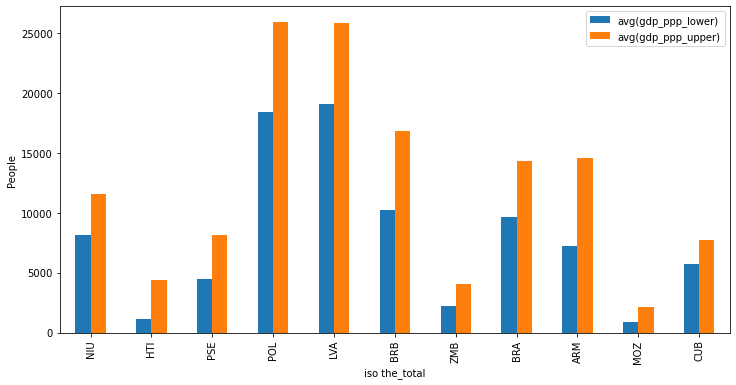

In [57]:
from matplotlib import pyplot as plt

currency_df =  data.select(['iso3', 
                       'gdp_ppp_lower', 
                       'gdp_ppp_upper', 
                       ]
                     )\
                     .groupBy('iso3')\
                     .mean()\
                     .toPandas()

ind = list(range(12))
ind.pop(6)

currency_df.iloc[ind ,:].plot(kind='bar', x='iso3', y=currency_df.columns.tolist()[1:], 
                         figsize=(12, 6), ylabel='People', xlabel='iso the_total')
plt.show()

## Zapisywanie/zapisywanie danych do pliku
Metoda `write.save()` służy do zapisywania danych w różnych formatach, takich jak CSV, JSVON, Parquet i inne. Przyjrzyjmy się, jak zapisywać dane do plików o różnych formatach. Za pomocą metody `select()` możemy zapisać zarówno wszystkie wiersze, jak i tylko wybrane.

In [58]:
# CSV
data.write.csv('dataset.csv')

# JSON
data.write.save('dataset.json', format='json')

# Parquet
data.write.save('dataset.parquet', format='parquet')

# Zapisywanie wybranych kolumn

# CSV
data.select(['location_name','iso3','year','gdp_ppp_mean','gdp_ppp_lower','gdp_ppp_upper'])\
    .write.csv('dataset_1.csv')

# JSON
data.select(['location_name','iso3','year','gdp_ppp_mean','gdp_ppp_lower','gdp_ppp_upper'])\
    .write.save('dataset_1.json', format='json')

# Parquet
data.select(['location_name','iso3','year','gdp_ppp_mean','gdp_ppp_lower','gdp_ppp_upper'])\
    .write.save('dataset_1.parquet', format='parquet')